Author: Ekin Ugurel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read raw data
df = pd.read_csv('C:/Users/ekino/Downloads/vehicles.csv')

In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [4]:
# Statistical Analysis to get a better understanding of database
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [5]:
# Check for missing values
null_count = pd.DataFrame({'Null': df.isnull().sum()})
# Check for percent of values missing
length=len(df)
percent_null = round((null_count['Null']/length)*100,1)
null_count['Percentage'] = percent_null
# Sort from highest percentage to lowest
null_count.sort_values(by='Null', ascending=False)

,Null,Percentage
county,426880,100.0
size,306361,71.8
cylinders,177678,41.6
condition,174104,40.8
VIN,161042,37.7
drive,130567,30.6
paint_color,130203,30.5
type,92858,21.8
manufacturer,17646,4.1
title_status,8242,1.9


In [6]:
# Drop columns that have too many missing values or that are irrelevant
df.drop(['posting_date', 'county','VIN','url','region_url','image_url','id','lat','long','description'], axis=1, inplace=True)
df.shape

(426880, 16)

In [7]:
# Check for duplicates
df.duplicated().sum()

56415

In [8]:
# Drop duplicates and keep one of each
df = df.drop_duplicates(keep='first')

In [9]:
# remove inconsistent data entry (e.g. spaces in the cell)
columns = ['manufacturer', 'condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

for i in columns:
    df[i] = df[i].str.strip()

In [11]:
# Drop 10% of each side on price (outliers)
sort = sorted(df['price'])
q1, q2 = np.percentile(sort, [10,90])
print(q1, q2)

1200.0 37740.0


In [12]:
df = df[(df.price <= 37740.0) & (df.price >= 1200)]
df.shape

(296798, 16)

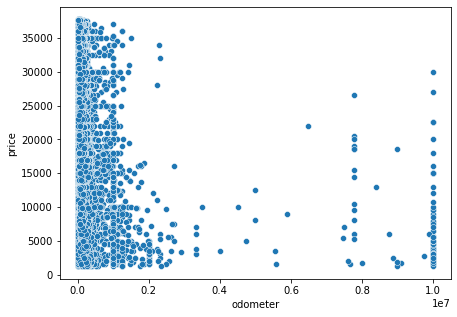

In [14]:
# Visualize odometer distribution to check for outliers
plt.figure(figsize=[7,5])
odo = sns.scatterplot(x = df['odometer'], y=df['price'])

In [15]:
# Since cars after 300,000 miles of use become almost obsolete, drop all values greater than 3e5
df = df[(df.odometer < 3e5)]

In [16]:
# Also drop odometers that equal 0, as we are concerned with used cars (not new)
df.drop(df[df['odometer']==0.0].index, inplace=True)

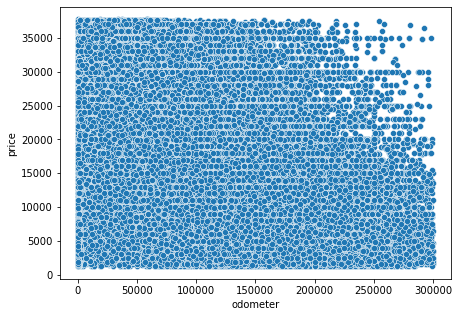

In [17]:
plt.figure(figsize=[7,5])
odo = sns.scatterplot(x = df['odometer'], y=df['price'])

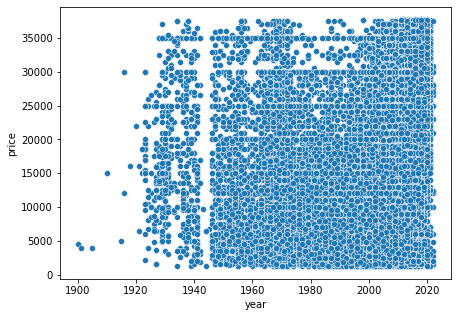

In [18]:
# handle outliers for "year"
plt.figure(figsize=[7,5])
odo = sns.scatterplot(x = df['year'], y=df['price'])

In [19]:
# Since outliers begin (roughly) before the year 1945, drop all such entries
df.drop(df[df['year'] <= 1945].index, inplace=True)

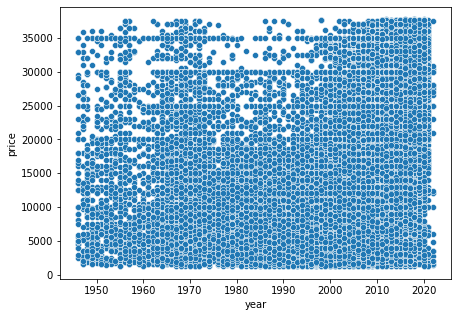

In [20]:
# Check the scatter plot again
plt.figure(figsize=[7,5])
odo = sns.scatterplot(x = df['year'], y=df['price'])

C:\Users\ekino\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ekino\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

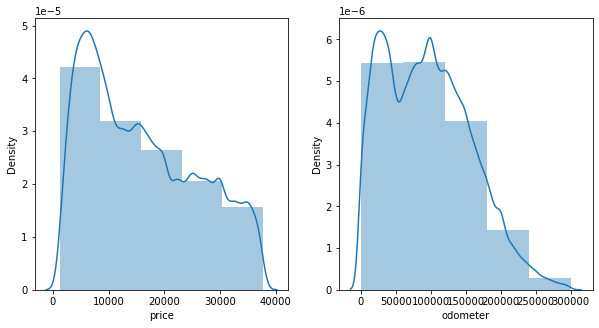

In [21]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(df['price'], bins = 5)
plt.subplot(122)
sns.distplot(df['odometer'], bins=5)

In [22]:
# Fill in NaN values for columns "condition" and "title status"
bins = [0,30000,60000,90000,115000,150000,1000000]
groups = df.groupby(['title_status', pd.cut(df.odometer,bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 1000000]"
title_status,,,,,,
clean,47388,42932,42568,39304,47848,55974
lien,127,166,261,192,210,204
missing,130,53,63,85,58,78
parts only,14,12,7,11,11,23
rebuilt,981,1393,1424,898,896,716
salvage,429,535,594,446,542,730


In [23]:
# Since an overwhelming majority of the entries have "clean" titles, this column becomes insignificant. So we drop this as well.
df.drop(['title_status'], axis = 1, inplace=True)

In [24]:
# Now, let's check the distribution for condition
bins = [0,30000,60000,90000,115000,150000,1000000]
groups = df.groupby(['condition', pd.cut(df.odometer,bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 1000000]"
condition,,,,,,
excellent,4606,8272,13169,14048,16917,15101
fair,252,188,348,583,948,2916
good,30487,20022,12201,8393,10928,17649
like new,2719,2670,2692,2374,2563,1839
new,233,69,82,53,75,74
salvage,29,40,38,50,63,135


In [25]:
# Replace missing entries with the median condition for each odometer level
g1 = (df['odometer'] > 60000) & (df['odometer'] <= 150000)
g2 = (df['odometer'] <= 60000) | (df['odometer'] > 150000)

df.loc[g1,'condition']=df.loc[g1,'condition'].fillna('excellent')
df.loc[g2,'condition']=df.loc[g2,'condition'].fillna('good')

In [26]:
# Check for missing values again
null_count = pd.DataFrame({'Null': df.isnull().sum()})
# Check for percent of values missing
length=len(df)
percent_null = round((null_count['Null']/length)*100,1)
null_count['Percentage'] = percent_null
# Sort from highest percentage to lowest
null_count.sort_values(by='Null', ascending=False)

,Null,Percentage
size,203732,69.8
cylinders,115143,39.5
drive,88694,30.4
paint_color,80567,27.6
type,62264,21.3
manufacturer,10519,3.6
model,3076,1.1
fuel,1578,0.5
transmission,1078,0.4
year,471,0.2


In [27]:
# Drop 'size' column, as it has too many missing values
df.drop('size', axis=1, inplace=True)
# For columns with less than 4% missing values, drop the empty rows
df = df.dropna(subset=['manufacturer','model','fuel','transmission','year'])

In [28]:
# Use "ffill" to propagate non-null values forward or backward for columns with 10-30% missing values
columns = ['drive','type','paint_color']
for i in columns:
    df[i] = df[i].fillna(method='ffill')

C:\Users\ekino\AppData\Local\Temp/ipykernel_52636/4242946631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(method='ffill')


In [29]:
# Drop the empty rows if there are any left
df = df.dropna(subset=['type'])
df = df.dropna(subset=['drive'])

In [30]:
# Check for missing values again
null_count = pd.DataFrame({'Null': df.isnull().sum()})
# Check for percent of values missing
total=len(df)
percent_null = round((null_count['Null']/total)*100,1)
null_count['Percentage'] = percent_null
# Sort from highest percentage to lowest
null_count.sort_values(by='Null', ascending=False)

,Null,Percentage
cylinders,107802,39.1
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0


In [31]:
# Only column left to deal with is 'cylinders'. 
# We can use the 'drive' column to make best-guesses about the missing values in 'cylinder'
df.groupby(['drive','cylinders']).cylinders.count()

drive  cylinders   
4wd    10 cylinders      371
       12 cylinders        8
       3 cylinders       108
       4 cylinders     15361
       5 cylinders       335
       6 cylinders     30062
       8 cylinders     23839
       other             177
fwd    10 cylinders       38
       12 cylinders        4
       3 cylinders       247
       4 cylinders     35256
       5 cylinders       791
       6 cylinders     21727
       8 cylinders      3031
       other             245
rwd    10 cylinders      464
       12 cylinders       52
       3 cylinders        25
       4 cylinders      5031
       5 cylinders       134
       6 cylinders     13983
       8 cylinders     16506
       other             157
Name: cylinders, dtype: int64

In [32]:
# Fill in the median value of "cylinders" for each type of "drive"
values = {'4wd': '6 cylinders', 'fwd': '4 cylinders', 'rwd': '8 cylinders'}
df.loc[df['cylinders'].isna(), 'cylinders'] = df.loc[df['cylinders'].isna(),'drive'].map(lambda x: values[x])

In [33]:
# Check for missing values again
null_count = pd.DataFrame({'Null': df.isnull().sum()})
# Check for percent of values missing
total=len(df)
percent_null = round((null_count['Null']/total)*100,1)
null_count['Percentage'] = percent_null
# Sort from highest percentage to lowest
null_count.sort_values(by='Null', ascending=False)

,Null,Percentage
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0


In [34]:
# Since 'region' and 'state' are directly related to one another, join these two columns
df['region'] = df['region'] + ' (' + df['state'] + ')'
df.drop(['state'], axis = 1, inplace=True)

In [35]:
df.shape

(275754, 13)

In [40]:
# change the order of columns such that 'price' is last
columns = ['region', 'year', 'manufacturer', 'model', 'condition', 
                'cylinders','fuel','odometer', 'transmission','drive','type','paint_color','price']
df = df.reindex(columns=columns)
df.head(1)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,price
31,auburn (al),2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black,15000


In [37]:
df.describe()

,year,odometer,price
count,275754.000000,275754.000000,275754.000000
mean,2010.922514,96569.286777,16157.680465
std,8.243936,61415.561154,10013.385017
min,1946.000000,1.000000,1200.000000
25%,2008.000000,43213.000000,7450.000000
50%,2013.000000,93000.000000,14500.000000
75%,2016.000000,139594.000000,23999.000000
max,2022.000000,299999.000000,37740.000000


In [41]:
# This dataset looks good. We will download this as a CSV and use it in our analysis.
df.to_csv('preprocessedusedcars.csv')

In [42]:
# However, we also want to check if there are highly correlated features using a Correlation Matrix.
# If so, we would drop one of these features so that our analysis isn't redundant
df2 = df.copy() # make a copy of dataframe

In [44]:
# In order to check for correlation, we must convert all "categorical" features into numerical features
# We use the LabelEncoder function from sklearn to do this
from sklearn.preprocessing import LabelEncoder
categories = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 
                'drive', 'type', 'paint_color', 'condition']
encoder = LabelEncoder()
encoded = df[categories].apply(encoder.fit_transform)
df2.drop(categories, axis=1, inplace=True)
df2 = pd.concat([encoded, df2], axis=1)

df2.head(10)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,condition,year,odometer,price
31,18,13,7661,5,2,0,2,10,0,0,2013.0,128000.0,15000
32,18,14,15026,6,2,2,0,8,0,2,2012.0,68696.0,27990
33,18,7,15203,5,2,2,0,8,9,2,2016.0,29499.0,34590
34,18,38,16252,5,2,0,0,10,5,0,2019.0,43000.0,35000
35,18,7,4875,5,2,2,0,8,8,2,2016.0,17302.0,29990
37,18,20,4381,5,2,0,0,8,8,0,1992.0,192000.0,4500
38,18,20,17954,5,2,2,0,7,9,2,2017.0,30041.0,32990
39,18,7,15257,5,2,2,0,8,10,2,2017.0,40784.0,24590
40,18,7,4871,5,4,2,0,8,1,2,2016.0,34940.0,30990
41,18,38,16289,5,4,2,0,8,8,2,2014.0,17805.0,27990


<AxesSubplot:>

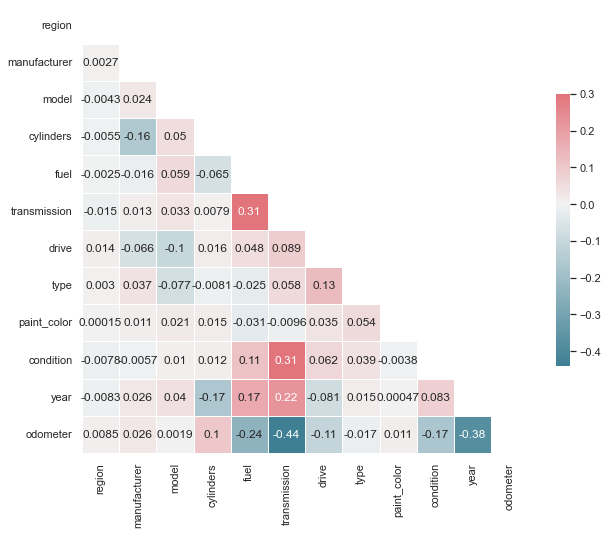

In [52]:
# Correlation Heat Map
sns.set(style='whitegrid')
cor = df2.drop(columns=['price']).corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True)

In [57]:
columns = ['region', 'year', 'manufacturer', 'model', 'condition', 
                'cylinders','fuel','odometer', 'transmission','drive','type','paint_color','price']
df2 = df2.reindex(columns=columns)
df2.head(1)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,price
31,18,2013.0,13,7661,0,5,2,128000.0,0,2,10,0,15000


In [58]:
# No features are highly correlated, so we keep the set as is.
df2.to_csv('numericalpreprocesseddata.csv')

## Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

df3 = df2.copy()

sc_X = StandardScaler()

df3 = pd.DataFrame(sc_X.fit_transform(df3))

In [81]:
df3.columns = df2.columns.values
df3.index = df2.index.values
df3

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,price
31,-1.502218,0.252002,-0.494407,-0.381586,-1.110363,0.441261,-0.118922,0.511772,-0.528928,1.587585,1.002783,-1.365641,-0.115614
32,-1.502218,0.130701,-0.406595,1.017568,0.765387,1.243918,-0.118922,-0.453848,2.073795,-1.076738,0.501780,-1.365641,1.181652
33,-1.502218,0.615907,-1.021277,1.051193,0.765387,0.441261,-0.118922,-1.092075,2.073795,-1.076738,0.501780,0.824962,1.840771
34,-1.502218,0.979811,1.700885,1.250475,-1.110363,0.441261,-0.118922,-0.872244,-0.528928,-1.076738,1.002783,-0.148639,1.881717
35,-1.502218,0.615907,-1.021277,-0.910852,0.765387,0.441261,-0.118922,-1.290673,2.073795,-1.076738,0.501780,0.581562,1.381385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1.716424,0.979811,0.998391,0.348671,0.765387,0.441261,-0.118922,-1.047673,2.073795,0.255424,0.752282,1.068362,0.742240
426876,1.716424,1.101113,1.876508,0.904153,0.765387,-1.164052,-0.118922,-1.376531,2.073795,0.255424,0.752282,0.581562,1.441305
426877,1.716424,1.101113,-1.109088,1.669936,0.765387,-1.164052,-3.080459,-1.504431,2.073795,0.255424,-0.500225,1.068362,1.880718
426878,1.716424,0.858510,0.383710,-0.525016,0.765387,0.441261,-0.118922,-1.082094,2.073795,0.255424,0.752282,0.824962,1.281519


In [82]:
df3.to_csv('scaledcardata.csv')

In [60]:
X = df2.iloc[:,:-1]  #independent columns
y = df2.iloc[:,-1]    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

scores = []
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest, X_train, y_train, scoring='r2', cv=5)
scores.append(round(acc.mean()*100,2))

In [65]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores})
results

,Metrics,Accuracy
0,R2,86.87


In [67]:
#To improve the performance of the model, we optimise hyper-parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300]}
forest = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [68]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 300}

In [69]:
scores2 = []
best_grid = grid_search.best_estimator_
acc2 = cross_val_score(best_grid, X_train, y_train, scoring='r2', cv=5)
scores2.append(round(acc2.mean()*100,2))

In [70]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2})
results

,Metrics,Accuracy,Accuracy Tuned Param
0,R2,86.87,87.62


In [71]:
#Finally let's check the performance on the Test Set
from sklearn.metrics import r2_score

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
acc_test = round(r2_score(y_test,y_pred)*100,2)

In [72]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2,
    'Accuracy Test Set': acc_test})
results

,Metrics,Accuracy,Accuracy Tuned Param,Accuracy Test Set
0,R2,86.87,87.62,88.69


In [73]:
#Other metrics apart from R2 
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2067.64
Mean Squared Error: 11375675.1
Root Mean Squared Error: 3372.78


In [74]:
name = []
importance = []
for nam, imp in zip(X, best_grid.feature_importances_):
    name.append(nam)
    importance.append(round(imp*100,2))

In [88]:
for imp in best_grid.feature_importances_:
    print(round(imp*100, 2))

2.21
43.3
5.42
10.34
1.28
8.96
4.12
16.73
2.24
1.64
2.39
1.37


In [75]:
features = pd.DataFrame({'Features': name, "Importance (%)": importance})
features.sort_values(by='Importance (%)', ascending = False)

,Features,Importance (%)
1,year,43.30
7,odometer,16.73
3,model,10.34
5,cylinders,8.96
2,manufacturer,5.42
6,fuel,4.12
10,type,2.39
8,transmission,2.24
0,region,2.21
9,drive,1.64


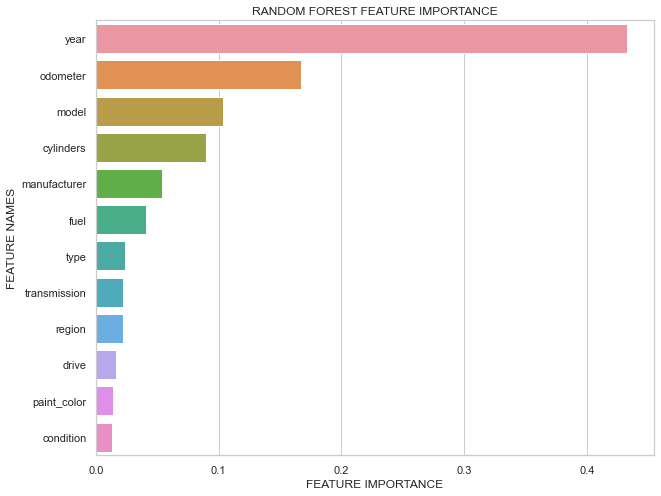

In [76]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(best_grid.feature_importances_,X.columns,'RANDOM FOREST')